### Feature importance 

In [28]:
microdados_rj = pd.read_csv('dataframe_tratado.csv')

In [29]:
microdados_rj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325364 entries, 0 to 325363
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   RECEM_FORMADO                    325364 non-null  int64 
 1   CLASSE_RENDA_PERCAPITA_FAMILIAR  325364 non-null  int64 
 2   CLASSE_TP_COR_RACA               325364 non-null  int64 
 3   CLASSE_IDADE                     325364 non-null  int64 
 4   Q001_Q002                        325364 non-null  int64 
 5   Q024                             325364 non-null  int64 
 6   Q025                             325364 non-null  int64 
 7   CLASSE_RENDIMENTO                235833 non-null  object
 8   CLASSE_RENDIMENTO_GERAL          235279 non-null  object
dtypes: int64(7), object(2)
memory usage: 22.3+ MB


### Feature importance - features do artigo + (computador e internet) e target média

In [286]:
from pycaret.classification import *

init = setup(data=microdados_rj,
             ignore_features=['CLASSE_RENDIMENTO'],
             target='CLASSE_RENDIMENTO_GERAL',
             train_size=0.8,
             fold=5,
             fix_imbalance=False,
             use_gpu=True,
             silent=True,
             session_id=7)

,Description,Value
0,session_id,7
1,Target,CLASSE_RENDIMENTO_GERAL
2,Target Type,Multiclass
3,Label Encoded,"0.0: 0, 1.0: 1, 2.0: 2"
4,Original Data,"(325364, 9)"
5,Missing Values,True
6,Numeric Features,0
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [287]:
compare_models(include=['lr', 'dt', 
                        'rf', 'nb',
                        'knn', 'lightgbm'], fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7669,0.6748,0.4005,0.7200,0.6941,0.1328,0.1977,4.434
rf,Random Forest Classifier,0.7660,0.6669,0.4008,0.7100,0.6947,0.1331,0.1949,9.562
dt,Decision Tree Classifier,0.7653,0.6665,0.4011,0.7045,0.6950,0.1332,0.1926,0.410
lr,Logistic Regression,0.7645,0.6696,0.3888,0.7206,0.6873,0.1108,0.1750,19.702
knn,K Neighbors Classifier,0.7360,0.5913,0.4196,0.6763,0.6923,0.1425,0.1596,89.716
nb,Naive Bayes,0.4248,0.6520,0.5838,0.6871,0.4509,0.1559,0.2086,0.244


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=7, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [292]:
lgbm = create_model('lightgbm',
                    fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7678,0.6759,0.4083,0.7175,0.6974,0.1462,0.2089
1,0.7674,0.6802,0.3987,0.7186,0.6934,0.1303,0.1974
2,0.7664,0.6761,0.3970,0.7178,0.6926,0.1268,0.1919
3,0.7671,0.6697,0.3971,0.7191,0.6932,0.1274,0.1945
4,0.7661,0.6721,0.4012,0.7269,0.6938,0.1335,0.1958
Mean,0.7669,0.6748,0.4005,0.7200,0.6941,0.1328,0.1977
SD,0.0006,0.0036,0.0042,0.0035,0.0017,0.0071,0.0059


In [303]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=7, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

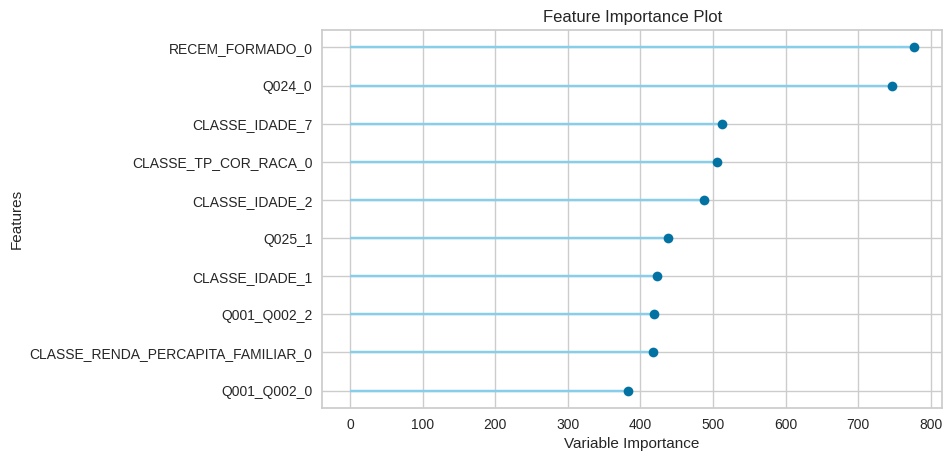

In [293]:
plot_model(lgbm, plot='feature')

In [294]:
rf = create_model('rf',
                  fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7671,0.6686,0.4066,0.7103,0.6973,0.1433,0.2048
1,0.7663,0.6720,0.4011,0.7091,0.6950,0.1341,0.1963
2,0.7652,0.6692,0.3996,0.7082,0.6937,0.1305,0.1907
3,0.7664,0.6607,0.3981,0.7107,0.6938,0.1287,0.1930
4,0.7652,0.6642,0.3985,0.7118,0.6938,0.1290,0.1896
Mean,0.7660,0.6669,0.4008,0.7100,0.6947,0.1331,0.1949
SD,0.0007,0.0040,0.0031,0.0013,0.0014,0.0054,0.0055


In [302]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

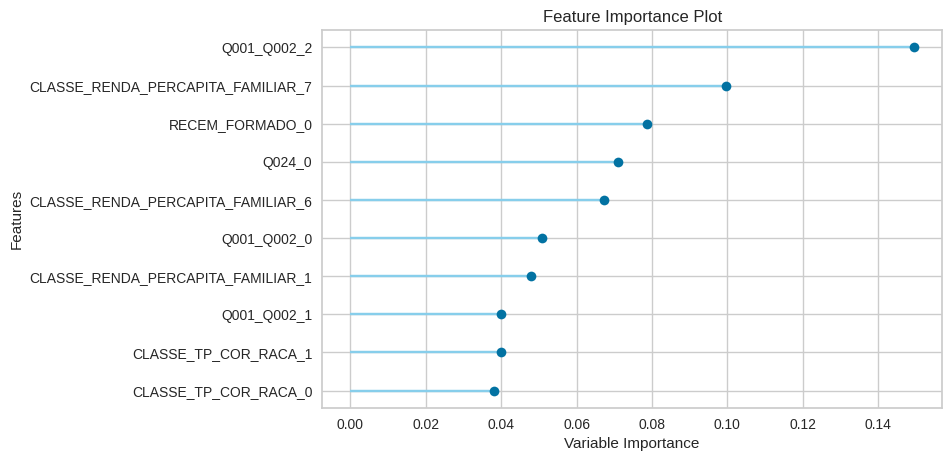

In [295]:
plot_model(rf, plot='feature')

In [289]:
dt = create_model('dt',
                  fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7666,0.6684,0.4069,0.7062,0.6975,0.1435,0.2033
1,0.7657,0.6716,0.4015,0.7047,0.6953,0.1343,0.1944
2,0.7645,0.6688,0.3999,0.7034,0.6941,0.1306,0.1888
3,0.7653,0.6600,0.3981,0.7023,0.6939,0.1281,0.1891
4,0.7644,0.6636,0.3990,0.7059,0.6941,0.1293,0.1873
Mean,0.7653,0.6665,0.4011,0.7045,0.6950,0.1332,0.1926
SD,0.0008,0.0041,0.0031,0.0015,0.0014,0.0056,0.0059


In [300]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

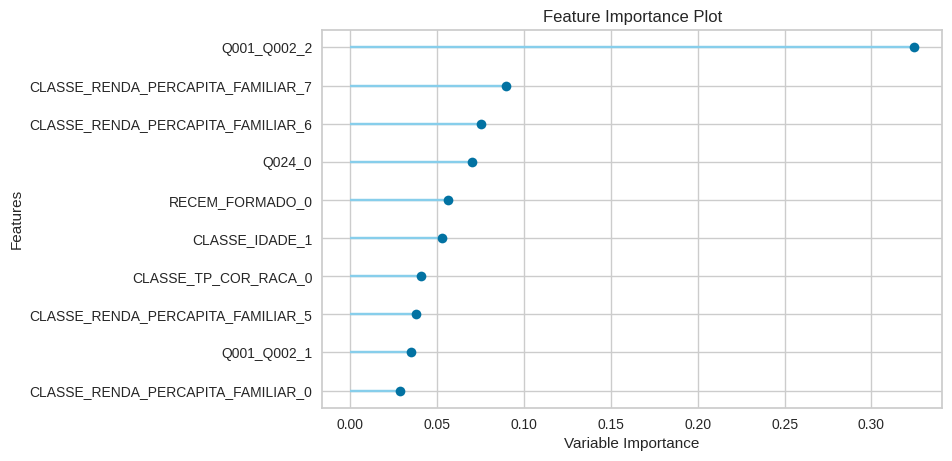

In [291]:
plot_model(dt, plot='feature')

In [298]:
lr = create_model('lr',
                  fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7660,0.6708,0.3933,0.7214,0.6899,0.1197,0.1863
1,0.7649,0.6756,0.3891,0.7149,0.6875,0.1116,0.1769
2,0.7637,0.6708,0.3890,0.7167,0.6870,0.1108,0.1724
3,0.7644,0.6659,0.3869,0.7182,0.6868,0.1076,0.1725
4,0.7635,0.6650,0.3857,0.7316,0.6855,0.1044,0.1670
Mean,0.7645,0.6696,0.3888,0.7206,0.6873,0.1108,0.1750
SD,0.0009,0.0039,0.0026,0.0059,0.0014,0.0051,0.0064


In [299]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

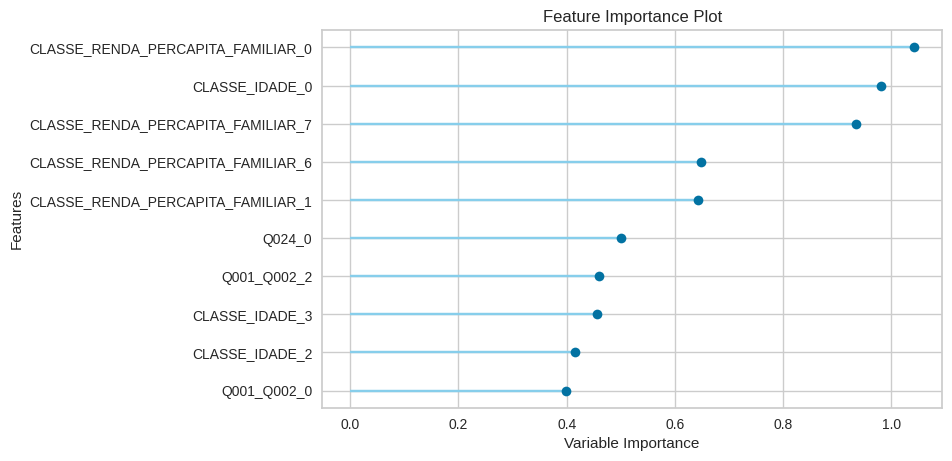

In [301]:
plot_model(lr, plot='feature')

In [304]:
knn = create_model('knn',
                   fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7246,0.5926,0.4245,0.6719,0.6893,0.1415,0.1519
1,0.7460,0.5969,0.4322,0.6892,0.7015,0.1684,0.1900
2,0.7383,0.5927,0.4052,0.6716,0.6876,0.1227,0.1428
3,0.7344,0.5853,0.4174,0.6729,0.6907,0.1377,0.1537
4,0.7367,0.5892,0.4189,0.6759,0.6925,0.1425,0.1596
Mean,0.7360,0.5913,0.4196,0.6763,0.6923,0.1425,0.1596
SD,0.0069,0.0039,0.0089,0.0066,0.0049,0.0147,0.0161


In [305]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [307]:
plot_model(knn, plot='feature')

TypeError: ignored

In [308]:
nb = create_model('nb',
                  fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4211,0.6518,0.5845,0.6854,0.4461,0.1544,0.2076
1,0.4277,0.6578,0.5909,0.6923,0.4533,0.1615,0.2165
2,0.4168,0.6503,0.5829,0.6874,0.4412,0.1533,0.2076
3,0.4300,0.6532,0.5828,0.6857,0.4576,0.1565,0.2075
4,0.4284,0.6468,0.5777,0.6846,0.4566,0.1539,0.2040
Mean,0.4248,0.6520,0.5838,0.6871,0.4509,0.1559,0.2086
SD,0.0050,0.0036,0.0043,0.0028,0.0063,0.0030,0.0042


In [309]:
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [310]:
tuned_nb = tune_model(nb,
                      n_iter=300,
                      fold=5,
                      optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7302,0.6565,0.4651,0.6909,0.6894,0.1966,0.2087
1,0.7332,0.6605,0.4651,0.6925,0.6907,0.1987,0.2120
2,0.7252,0.6529,0.4620,0.6846,0.6882,0.1893,0.1994
3,0.7304,0.6555,0.4657,0.6904,0.6925,0.1981,0.2094
4,0.7264,0.6519,0.4624,0.6843,0.6885,0.1907,0.2012
Mean,0.7291,0.6555,0.4641,0.6886,0.6898,0.1947,0.2061
SD,0.0029,0.0030,0.0015,0.0034,0.0016,0.0039,0.0049


In [311]:
tuned_nb

GaussianNB(priors=None, var_smoothing=1)

In [312]:
plot_model(tuned_nb, plot='feature')

TypeError: ignored

### Feature importance - features do artigo + (computador e internet) e target matemática

In [313]:
from pycaret.classification import *

init = setup(data=microdados_rj,
             ignore_features=['CLASSE_RENDIMENTO_GERAL'],
             target='CLASSE_RENDIMENTO',
             train_size=0.8,
             fold=5,
             fix_imbalance=False,
             use_gpu=True,
             silent=True,
             session_id=7)

,Description,Value
0,session_id,7
1,Target,CLASSE_RENDIMENTO
2,Target Type,Multiclass
3,Label Encoded,"EXCELENTE: 0, INSUFICIENTE: 1, REGULAR: 2"
4,Original Data,"(325364, 9)"
5,Missing Values,True
6,Numeric Features,0
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [314]:
compare_models(include=['lr', 'dt', 
                        'rf', 'nb',
                        'knn', 'lightgbm'], fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5804,0.6591,0.4394,0.5706,0.5145,0.1609,0.2003,4.426
lr,Logistic Regression,0.5785,0.6585,0.4436,0.5670,0.5149,0.1642,0.2002,11.696
rf,Random Forest Classifier,0.5773,0.6516,0.4425,0.5614,0.5184,0.1636,0.1966,9.706
dt,Decision Tree Classifier,0.5761,0.6508,0.4431,0.5587,0.5187,0.1637,0.1950,0.412
knn,K Neighbors Classifier,0.5063,0.5982,0.4489,0.4941,0.4971,0.1418,0.1430,93.556
nb,Naive Bayes,0.4158,0.6456,0.5287,0.5108,0.3713,0.1839,0.2232,0.250


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=7, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [315]:
lgbm = create_model('lightgbm',
                    fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5817,0.6638,0.4418,0.5734,0.5155,0.1641,0.2042
1,0.5826,0.6614,0.4421,0.5737,0.5176,0.1655,0.2056
2,0.5793,0.6564,0.4379,0.5717,0.5141,0.1595,0.1980
3,0.5784,0.6579,0.4344,0.5659,0.5106,0.1536,0.1934
4,0.5799,0.6559,0.4410,0.5681,0.5149,0.1618,0.2001
Mean,0.5804,0.6591,0.4394,0.5706,0.5145,0.1609,0.2003
SD,0.0015,0.0031,0.0029,0.0031,0.0023,0.0042,0.0044


In [316]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=7, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

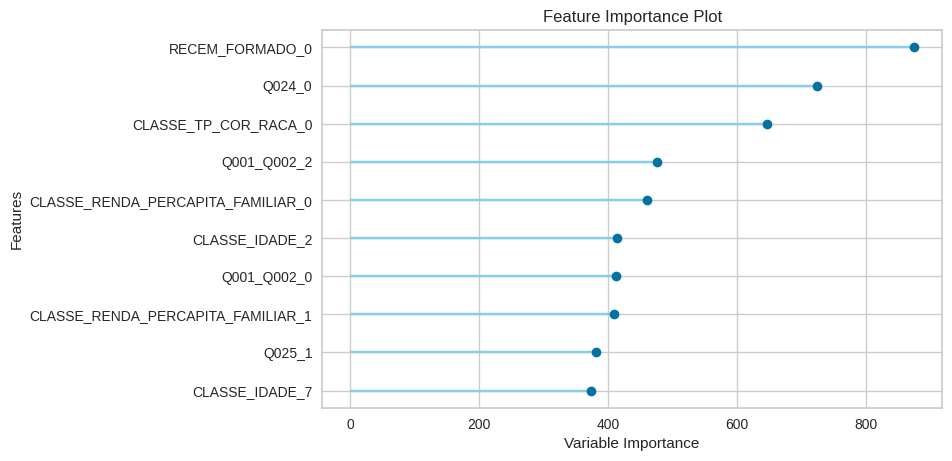

In [317]:
plot_model(lgbm, plot='feature')

In [318]:
rf = create_model('rf',
                  fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5784,0.6569,0.4449,0.5636,0.5186,0.1661,0.1999
1,0.5792,0.6543,0.4439,0.5644,0.5197,0.1663,0.2006
2,0.5785,0.6482,0.4426,0.5652,0.5196,0.1654,0.1991
3,0.5750,0.6497,0.4382,0.5558,0.5143,0.1567,0.1896
4,0.5754,0.6486,0.4430,0.5582,0.5197,0.1632,0.1935
Mean,0.5773,0.6516,0.4425,0.5614,0.5184,0.1636,0.1966
SD,0.0017,0.0034,0.0023,0.0037,0.0021,0.0036,0.0043


In [319]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

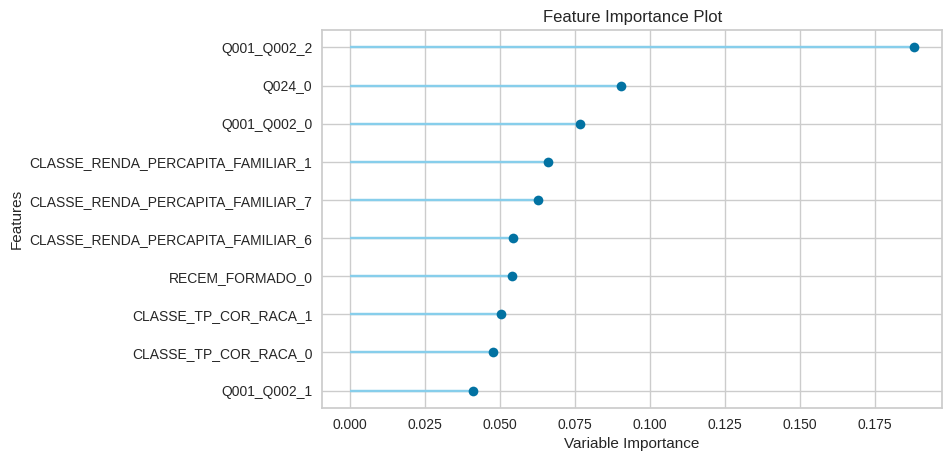

In [320]:
plot_model(rf, plot='feature')

In [321]:
dt = create_model('dt',
                  fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5771,0.6562,0.4456,0.5608,0.5193,0.1665,0.1983
1,0.5780,0.6535,0.4455,0.5615,0.5209,0.1676,0.1996
2,0.5771,0.6478,0.4427,0.5620,0.5190,0.1648,0.1971
3,0.5742,0.6488,0.4387,0.5540,0.5148,0.1571,0.1888
4,0.5739,0.6480,0.4430,0.5551,0.5193,0.1624,0.1913
Mean,0.5761,0.6508,0.4431,0.5587,0.5187,0.1637,0.1950
SD,0.0016,0.0034,0.0025,0.0034,0.0021,0.0037,0.0042


In [322]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

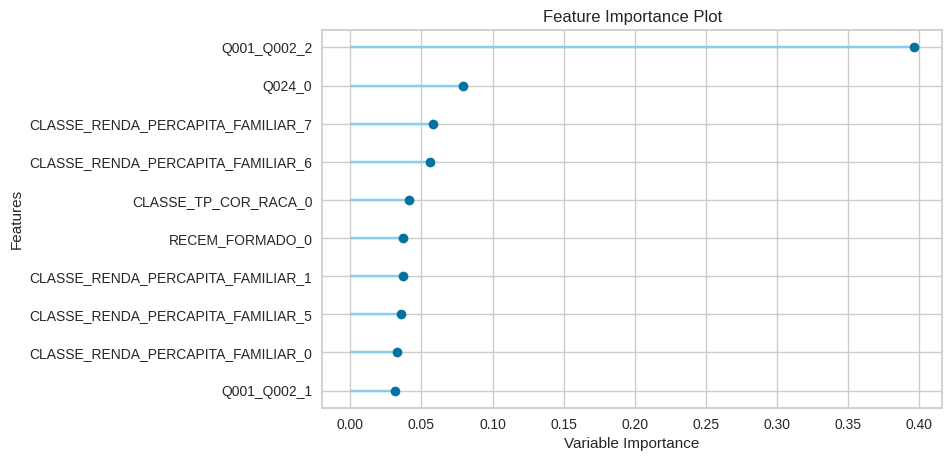

In [323]:
plot_model(dt, plot='feature')

In [324]:
lr = create_model('lr',
                  fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5803,0.6628,0.4466,0.5695,0.5153,0.1678,0.2051
1,0.5804,0.6614,0.4458,0.5700,0.5160,0.1679,0.2049
2,0.5758,0.6538,0.4428,0.5640,0.5156,0.1627,0.1955
3,0.5775,0.6573,0.4400,0.5652,0.5134,0.1597,0.1959
4,0.5785,0.6572,0.4430,0.5663,0.5142,0.1631,0.1995
Mean,0.5785,0.6585,0.4436,0.5670,0.5149,0.1642,0.2002
SD,0.0017,0.0032,0.0023,0.0024,0.0010,0.0032,0.0042


In [325]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

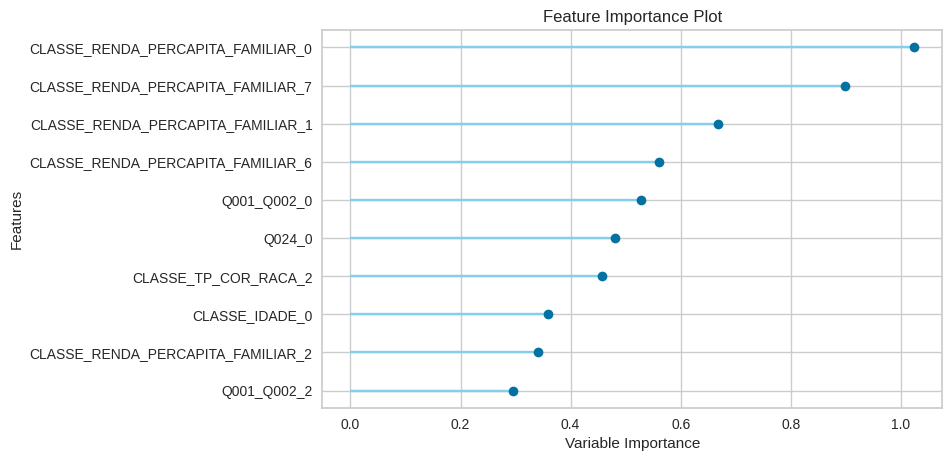

In [326]:
plot_model(lr, plot='feature')

In [327]:
knn = create_model('knn',
                   fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5129,0.5990,0.4478,0.4993,0.5029,0.1459,0.1474
1,0.4997,0.5977,0.4483,0.4907,0.4933,0.1378,0.1385
2,0.5093,0.6001,0.4537,0.4960,0.4983,0.1475,0.1491
3,0.5008,0.5965,0.4418,0.4884,0.4912,0.1325,0.1337
4,0.5086,0.5975,0.4532,0.4961,0.4998,0.1452,0.1463
Mean,0.5063,0.5982,0.4489,0.4941,0.4971,0.1418,0.1430
SD,0.0051,0.0013,0.0043,0.0040,0.0043,0.0057,0.0059


In [328]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [329]:
plot_model(knn, plot='feature')

TypeError: ignored

In [330]:
nb = create_model('nb',
                  fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4157,0.6507,0.5321,0.5149,0.3683,0.1864,0.2282
1,0.4157,0.6487,0.5306,0.5119,0.3698,0.1851,0.2254
2,0.4132,0.6398,0.5244,0.5020,0.3704,0.1784,0.2152
3,0.4154,0.6450,0.5290,0.5150,0.3697,0.1849,0.2257
4,0.4190,0.6436,0.5276,0.5102,0.3785,0.1847,0.2217
Mean,0.4158,0.6456,0.5287,0.5108,0.3713,0.1839,0.2232
SD,0.0019,0.0038,0.0027,0.0048,0.0036,0.0028,0.0045


In [331]:
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [332]:
tuned_nb = tune_model(nb,
                      n_iter=300,
                      fold=5,
                      optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5549,0.6560,0.4957,0.5426,0.5401,0.2119,0.2163
1,0.5574,0.6528,0.4953,0.5448,0.5426,0.2136,0.2181
2,0.5457,0.6441,0.4857,0.5335,0.5324,0.1966,0.2002
3,0.5516,0.6479,0.4896,0.5384,0.5377,0.2044,0.2083
4,0.5510,0.6462,0.4877,0.5375,0.5353,0.2004,0.2051
Mean,0.5521,0.6494,0.4908,0.5394,0.5376,0.2054,0.2096
SD,0.0040,0.0044,0.0040,0.0040,0.0036,0.0065,0.0068


In [333]:
tuned_nb

GaussianNB(priors=None, var_smoothing=1)

In [334]:
plot_model(tuned_nb, plot='feature')

TypeError: ignored

### Feature importance utilizando todas as features do dataset - target Média

In [1]:
import pandas as pd
import numpy as np

In [2]:
microdados_rj = pd.read_csv("MICRODADOS_RJ_ENEM_2019.csv")

microdados_rj.shape

(338710, 136)

In [3]:
microdados_rj['MEDIA_GERAL'] = (microdados_rj['NU_NOTA_CN'] + 
                                microdados_rj['NU_NOTA_CH'] + 
                                microdados_rj['NU_NOTA_LC'] + 
                                microdados_rj['NU_NOTA_MT'] + 
                                microdados_rj['NU_NOTA_REDACAO']) / 5

In [4]:
condicao = [microdados_rj['MEDIA_GERAL'] < 450, 
            microdados_rj['MEDIA_GERAL'] < 650, 
            microdados_rj['MEDIA_GERAL'] >= 650]
            
resultado = ['INSUFICIENTE', 'REGULAR', 'EXCELENTE']

microdados_rj['CLASSE_RENDIMENTO_GERAL'] = np.select(condicao, resultado)

In [5]:
microdados_rj['CLASSE_RENDIMENTO_GERAL'].value_counts()

REGULAR         185145
0                94370
INSUFICIENTE     32060
EXCELENTE        27135
Name: CLASSE_RENDIMENTO_GERAL, dtype: int64

In [6]:
microdados_rj.loc[microdados_rj['CLASSE_RENDIMENTO_GERAL'] == '0', 'CLASSE_RENDIMENTO_GERAL'] = np.nan
microdados_rj.CLASSE_RENDIMENTO_GERAL[(microdados_rj.CLASSE_RENDIMENTO_GERAL == 'INSUFICIENTE')] = 0
microdados_rj.CLASSE_RENDIMENTO_GERAL[(microdados_rj.CLASSE_RENDIMENTO_GERAL == 'REGULAR')] = 1
microdados_rj.CLASSE_RENDIMENTO_GERAL[(microdados_rj.CLASSE_RENDIMENTO_GERAL == 'EXCELENTE')] = 2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [7]:
microdados_rj['CLASSE_RENDIMENTO_GERAL'].value_counts()

1    185145
0     32060
2     27135
Name: CLASSE_RENDIMENTO_GERAL, dtype: int64

In [8]:
microdados_rj.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'MEDIA_GERAL', 'CLASSE_RENDIMENTO_GERAL'],
      dtype='object', length=138)

In [9]:
print(microdados_rj.columns.tolist())

['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_TEMPO_ADICIONAL', 'IN_LEITURA_

In [10]:
microdados_rj.shape

(338710, 138)

In [11]:
microdados_rj = microdados_rj[['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_TEMPO_ADICIONAL', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO', 'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE', 'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA', 'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO', 'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'MEDIA_GERAL', 'CLASSE_RENDIMENTO_GERAL']]

In [12]:
microdados_rj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338710 entries, 0 to 338709
Columns: 108 entries, CO_MUNICIPIO_RESIDENCIA to CLASSE_RENDIMENTO_GERAL
dtypes: float64(11), int64(63), object(34)
memory usage: 279.1+ MB


In [13]:
microdados_rj.reset_index(drop=True, inplace=True)

microdados_rj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338710 entries, 0 to 338709
Columns: 108 entries, CO_MUNICIPIO_RESIDENCIA to CLASSE_RENDIMENTO_GERAL
dtypes: float64(11), int64(63), object(34)
memory usage: 279.1+ MB


In [14]:
from pycaret.classification import *

init = setup(data=microdados_rj,
             ignore_features=['MEDIA_GERAL'],
             target='CLASSE_RENDIMENTO_GERAL',
             train_size=0.8,
             fold=5,
             fix_imbalance=False,
             use_gpu=True,
             silent=True,
             session_id=7)

,Description,Value
0,session_id,7
1,Target,CLASSE_RENDIMENTO_GERAL
2,Target Type,Multiclass
3,Label Encoded,"0.0: 0, 1.0: 1, 2.0: 2"
4,Original Data,"(338710, 108)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,98
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
lgbm = create_model('lightgbm',
                    fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7729,0.7187,0.4397,0.7399,0.7147,0.2020,0.2590
1,0.7722,0.7172,0.4429,0.7322,0.7149,0.2052,0.2592
2,0.7741,0.7176,0.4390,0.7406,0.7154,0.2021,0.2619
3,0.7733,0.7230,0.4437,0.7365,0.7156,0.2077,0.2632
4,0.7751,0.7244,0.4434,0.7442,0.7164,0.2086,0.2684
Mean,0.7735,0.7202,0.4417,0.7387,0.7154,0.2051,0.2623
SD,0.0010,0.0029,0.0020,0.0041,0.0006,0.0028,0.0034


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


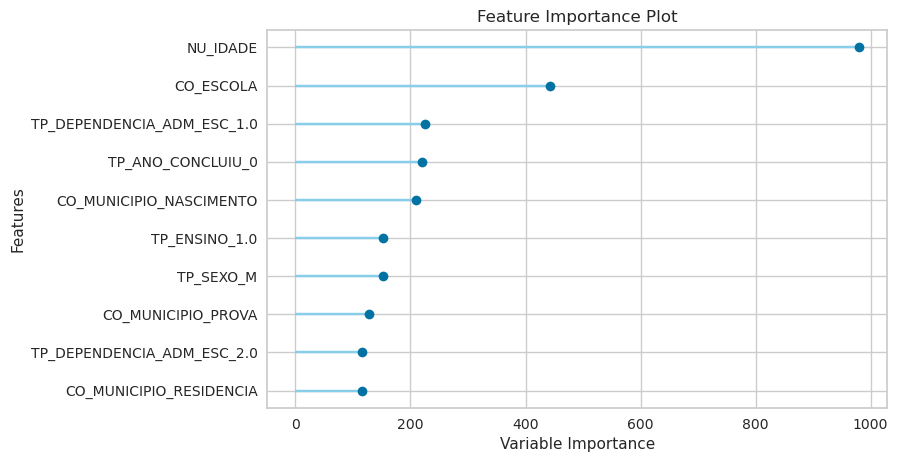

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(lgbm, plot='feature')

In [19]:
dt = create_model('dt',
                  fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6537,0.5555,0.4513,0.6576,0.6556,0.1371,0.1371
1,0.6574,0.5597,0.4549,0.6604,0.6589,0.1446,0.1446
2,0.6568,0.5567,0.4511,0.6589,0.6578,0.1395,0.1395
3,0.6546,0.5608,0.4584,0.6608,0.6576,0.1463,0.1463
4,0.6585,0.5590,0.4532,0.6605,0.6595,0.1435,0.1435
Mean,0.6562,0.5583,0.4538,0.6597,0.6579,0.1422,0.1422
SD,0.0018,0.0020,0.0027,0.0012,0.0013,0.0034,0.0034


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')
INFO:logs:create_model() succesfully completed......................................


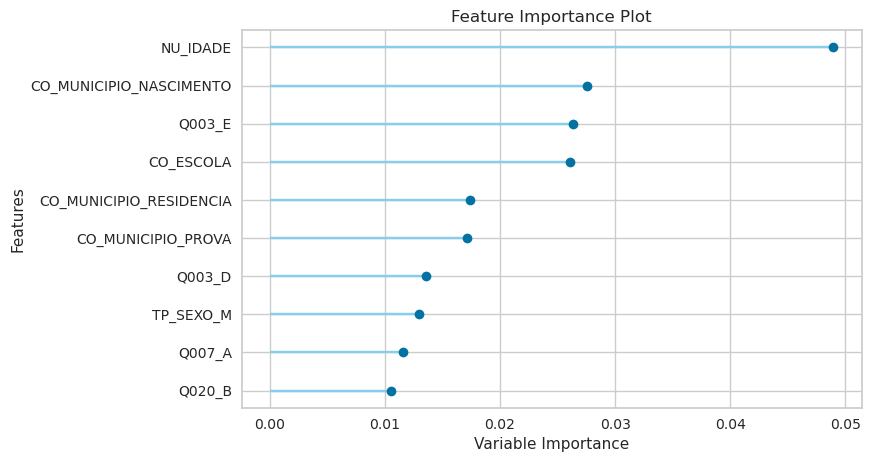

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [20]:
plot_model(dt, plot='feature')

In [21]:
rf = create_model('rf',
                  fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7685,0.6843,0.3895,0.7311,0.6888,0.1148,0.1983
1,0.7679,0.6784,0.3902,0.7314,0.6887,0.1157,0.1961
2,0.7680,0.6865,0.3893,0.7260,0.6886,0.1140,0.1953
3,0.7675,0.6893,0.3898,0.7126,0.6883,0.1141,0.1934
4,0.7680,0.6895,0.3905,0.7315,0.6890,0.1161,0.1969
Mean,0.7680,0.6856,0.3899,0.7265,0.6887,0.1149,0.1960
SD,0.0003,0.0041,0.0005,0.0073,0.0002,0.0008,0.0016


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


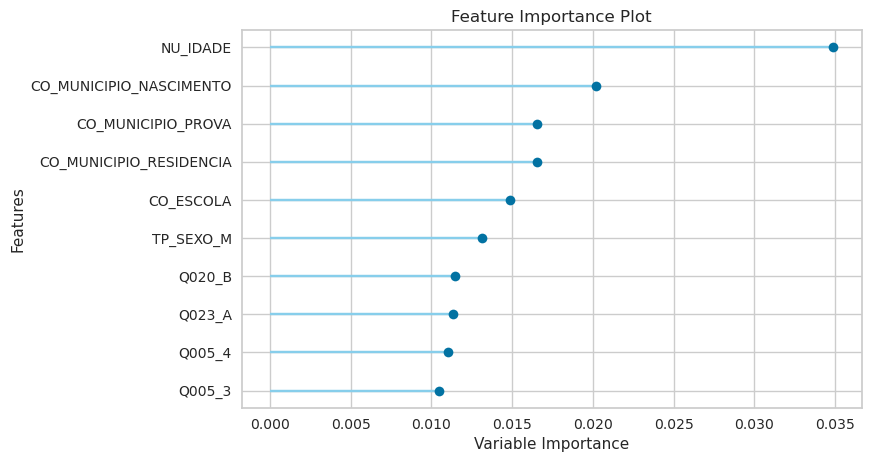

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
plot_model(rf, plot='feature')

In [24]:
lr = create_model('lr',
                  fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7576,0.5286,0.3334,0.6017,0.6532,0.0001,0.0017
1,0.7575,0.5207,0.3334,0.5879,0.6532,0.0001,0.0024
2,0.7574,0.5264,0.3333,0.6377,0.6532,0.0000,0.0004
3,0.7577,0.4997,0.3333,0.5741,0.6532,0.0000,0.0000
4,0.7576,0.5280,0.3334,0.6018,0.6532,0.0001,0.0024
Mean,0.7576,0.5207,0.3334,0.6006,0.6532,0.0001,0.0014
SD,0.0001,0.0109,0.0000,0.0212,0.0000,0.0000,0.0010


INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


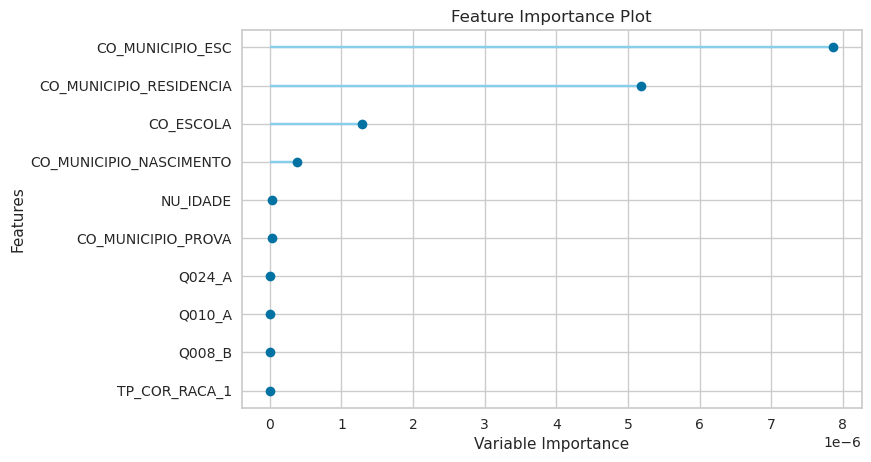

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(lr, plot='feature')